# 8장 머신러닝 응용

## 8.4 다양한 예측 사례 

In [115]:
# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# 버전 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 판다스와 넘피
import pandas as pd
import numpy as np

# 그림 그리기
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트

# 자료 스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 모델 선택
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# 성능지표
from sklearn.metrics import accuracy_score, plot_roc_curve 
from sklearn.metrics import plot_confusion_matrix, classification_report

# 파이프라인
from sklearn.pipeline import Pipeline, make_pipeline

# 시각화 툴
import scikitplot as skplt

# 모델저장
from joblib import dump, load

In [116]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '결측치 수(null)' : df.isnull().sum(),
                       '고유값 수(nunique)' : df.nunique()})
    return tf

## 8. PyCaret

http://pycaret.org/classification/

https://github.com/pycaret/pycaret/blob/master/examples/PyCaret%202%20Classification.ipynb

In [117]:
# check version
from pycaret.utils import version
version()

'2.1.2'

In [118]:
from pycaret.datasets import get_data
diabetes = get_data('diabetes')
diabetes.shape

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


(768, 9)

In [119]:
from pycaret.classification import *
clf1 = setup(data = diabetes, target = 'Class variable')

Setup Succesfully Completed!


,Description,Value
0,session_id,5173
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


INFO:logs:create_model_container 0
INFO:logs:master_model_container 0
INFO:logs:display_container 0
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Class variable',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagori...
                ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Emp

In [120]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Logistic Regression,0.7711,0.8270,0.5839,0.7101,0.6355,0.4725,0.4807,0.0482
1,CatBoost Classifier,0.7652,0.8371,0.5781,0.7097,0.6288,0.4613,0.4725,1.8564
2,Gradient Boosting Classifier,0.7615,0.8320,0.5836,0.6940,0.6265,0.4550,0.4641,0.1618
3,Ridge Classifier,0.7580,0.0000,0.5465,0.6927,0.6029,0.4354,0.4465,0.0104
4,Linear Discriminant Analysis,0.7543,0.8314,0.5520,0.6814,0.6022,0.4301,0.4399,0.0106
5,Light Gradient Boosting Machine,0.7539,0.8025,0.5725,0.6879,0.6178,0.4399,0.4488,0.0721
6,Extra Trees Classifier,0.7524,0.7906,0.5149,0.6996,0.5864,0.4181,0.4314,0.1516
7,Ada Boost Classifier,0.7503,0.8221,0.5997,0.6648,0.6261,0.4405,0.4453,0.1113
8,Extreme Gradient Boosting,0.7484,0.8050,0.6102,0.6589,0.6273,0.4394,0.4448,0.0757
9,Random Forest Classifier,0.7354,0.7790,0.4868,0.6747,0.5581,0.3779,0.3925,0.0342


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5173, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5173, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
models().head(7)
models().shape

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process.GPC,False


(18, 3)

In [122]:
lr = create_model('lr', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7963,0.8365,0.5789,0.7857,0.6667,0.5248,0.5375
1,0.7130,0.7801,0.4211,0.6400,0.5079,0.3173,0.3312
2,0.7757,0.8208,0.6486,0.6857,0.6667,0.4978,0.4983
3,0.7757,0.8498,0.5405,0.7407,0.6250,0.4705,0.4824
4,0.7664,0.8189,0.5405,0.7143,0.6154,0.4522,0.4612
Mean,0.7654,0.8212,0.5459,0.7133,0.6163,0.4525,0.4621
SD,0.0280,0.0234,0.0739,0.0493,0.0581,0.0720,0.0701


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5173, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [123]:
tunes_lr = tune_model(lr, fold = 5)
tunes_lr

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7963,0.8361,0.5526,0.8077,0.6563,0.5186,0.5375
1,0.7130,0.7861,0.4211,0.6400,0.5079,0.3173,0.3312
2,0.7477,0.8178,0.6486,0.6316,0.6400,0.4458,0.4459
3,0.7757,0.8259,0.5405,0.7407,0.6250,0.4705,0.4824
4,0.7570,0.8201,0.5676,0.6774,0.6176,0.4416,0.4453
Mean,0.7579,0.8172,0.5461,0.6995,0.6094,0.4388,0.4485
SD,0.0280,0.0168,0.0731,0.0664,0.0524,0.0666,0.0676


INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=4.484, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5173, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


LogisticRegression(C=4.484, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5173, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
pred_holdout = predict_model(lr)
pred_holdout.shape
pred_holdout.iloc[:, 20:27]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7186,0.793,0.5309,0.6143,0.5695,0.3622,0.3643


(231, 27)

,Number of times pregnant_6,Number of times pregnant_7,Number of times pregnant_8,Number of times pregnant_9,Class variable,Label,Score
0,0.0,0.0,0.0,0.0,0,0,0.2627
1,0.0,0.0,0.0,0.0,0,0,0.1317
2,0.0,0.0,0.0,0.0,0,1,0.5114
3,0.0,0.0,0.0,0.0,0,0,0.2205
4,0.0,0.0,0.0,0.0,0,1,0.5953
...,...,...,...,...,...,...,...
226,0.0,0.0,0.0,0.0,1,0,0.4113
227,0.0,0.0,0.0,0.0,0,0,0.0758
228,0.0,0.0,1.0,0.0,0,1,0.7469
229,1.0,0.0,0.0,0.0,1,0,0.0145


In [125]:
evaluate_model(tunes_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [126]:
df = pd.read_pickle('../data/4장자료_01.pkl')
df.shape
df.columns

(3997, 50)

Index(['성별', '연령', '지역', '직업', '가구소득', '학력', '주거형태', '결혼', '자녀수', '인터넷평일',
       '인터넷주말', '인터넷휴일', '모바일평일', '모바일주말', '모바일휴일', '연령대', 'drama1', 'drama2',
       'drama3', 'drama4', 'drama5', 'drama6', 'drama7', 'drama8', 'drama9',
       'drama10', 'drama11', 'drama12', 'drama13', 'drama14', 'drama15',
       'drama16', 'tv1', 'tv2', 'tv3', 'tv4', 'tv5', 'tv6', 'tv7', 'tv8',
       'tv9', 'tv10', 'tv11', 'tv12', 'tv13', 'tv14', 'tv15', 'tv16', 'tv17',
       '구매'],
      dtype='object')

In [127]:
cat_list = list(df.select_dtypes(include=['category']).columns)
clf1 = setup(data = df, 
             target = '구매',
             numeric_imputation = 'mean',
             categorical_features = cat_list, 
             ignore_features = ['연령대'],
             normalize = True,
             silent = True)

Setup Succesfully Completed!


,Description,Value
0,session_id,3675
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(3997, 50)"
4,Missing Values,False
5,Numeric Features,11
6,Categorical Features,38
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


INFO:logs:create_model_container 0
INFO:logs:master_model_container 0
INFO:logs:display_container 0
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['성별', '지역', '직업',
                                                            '학력', '주거형태', '결혼',
                                                            '연령대'],
                                      display_types=False,
                                      features_todrop=['연령대'],
                                      ml_usecase='classification',
                                      numerical_features=[], target='구매',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=No...
                 Scaling_and_Power_transformation(function_to_apply='zscore',
       

In [128]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.7029,0.7006,0.3378,0.6365,0.4386,0.2631,0.2881,6.2848
1,Random Forest Classifier,0.6968,0.6674,0.3245,0.6224,0.4253,0.2467,0.2712,0.0574
2,Light Gradient Boosting Machine,0.6947,0.6848,0.3873,0.5877,0.4649,0.2657,0.2770,0.2268
3,Gradient Boosting Classifier,0.6918,0.6836,0.2955,0.6167,0.3980,0.2251,0.2528,0.7462
4,Extra Trees Classifier,0.6908,0.6871,0.3656,0.5870,0.4490,0.2509,0.2648,0.3043
5,Extreme Gradient Boosting,0.6775,0.6771,0.4099,0.5465,0.4677,0.2436,0.2490,0.5971
6,Ridge Classifier,0.6743,0.0000,0.2791,0.5614,0.3711,0.1849,0.2056,0.0254
7,Linear Discriminant Analysis,0.6743,0.6627,0.2997,0.5561,0.3877,0.1936,0.2109,0.0643
8,Logistic Regression,0.6736,0.6647,0.2935,0.5551,0.3824,0.1897,0.2076,0.1045
9,Ada Boost Classifier,0.6693,0.6650,0.2894,0.5411,0.3753,0.1797,0.1957,0.3471


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:<catboost.core.CatBoostClassifier object at 0x000001FD85C4AB20>
INFO:logs:compare_models() succesfully completed......................................


In [129]:
catboost = create_model('catboost', fold = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7085,0.6882,0.3426,0.6529,0.4494,0.2765,0.3031
1,0.7082,0.7078,0.3642,0.6413,0.4646,0.2843,0.3058
2,0.7178,0.7129,0.3560,0.6765,0.4665,0.2990,0.3274
Mean,0.7115,0.7030,0.3543,0.6569,0.4602,0.2866,0.3121
SD,0.0045,0.0106,0.0089,0.0146,0.0077,0.0093,0.0109


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:<catboost.core.CatBoostClassifier object at 0x000001FD83609430>
INFO:logs:create_model() succesfully completed......................................


In [130]:
tunes_cat = tune_model(catboost, fold = 3)
tunes_cat

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6977,0.6910,0.2901,0.6438,0.4000,0.2349,0.2683
1,0.7049,0.7044,0.3086,0.6623,0.4211,0.2568,0.2905
2,0.7114,0.7173,0.3344,0.6667,0.4454,0.2783,0.3085
Mean,0.7047,0.7042,0.3110,0.6576,0.4221,0.2567,0.2891
SD,0.0056,0.0108,0.0181,0.0099,0.0185,0.0177,0.0165


INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 4
INFO:logs:<catboost.core.CatBoostClassifier object at 0x000001FD87A09BB0>
INFO:logs:tune_model() succesfully completed......................................


In [132]:
ensemble = models(type ='ensemble').index.tolist()
ensemble
compare_models

['rf', 'ada', 'gbc', 'et', 'xgboost', 'lightgbm', 'catboost']

<function pycaret.classification.compare_models(exclude=None, include=None, fold=10, round=4, sort='Accuracy', n_select=1, budget_time=0, turbo=True, verbose=True)>

In [133]:
ensembled_models = compare_models(include = ensemble, fold = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.7115,0.7030,0.3543,0.6569,0.4602,0.2866,0.3121,5.2819
1,Gradient Boosting Classifier,0.7008,0.6876,0.3172,0.6391,0.4240,0.2516,0.2797,0.6692
2,Light Gradient Boosting Machine,0.6872,0.6893,0.4017,0.5719,0.4714,0.2587,0.2672,0.1908
3,Extra Trees Classifier,0.6843,0.6839,0.3502,0.5733,0.4341,0.2331,0.2468,0.2773
4,Random Forest Classifier,0.6800,0.6646,0.2914,0.5809,0.3876,0.2017,0.2242,0.0555
5,Extreme Gradient Boosting,0.6789,0.6770,0.4161,0.5497,0.4734,0.2489,0.2540,0.5143
6,Ada Boost Classifier,0.6743,0.6618,0.3059,0.5551,0.3941,0.1966,0.2128,0.2719


INFO:logs:create_model_container: 4
INFO:logs:master_model_container: 4
INFO:logs:display_container: 6
INFO:logs:<catboost.core.CatBoostClassifier object at 0x000001FDFD9D8640>
INFO:logs:compare_models() succesfully completed......................................


INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=<catboost.core.CatBoostClassifier object at 0x000001FD87A09BB0>, plot=summary, feature=None, observation=None)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:plot type: summary
INFO:logs:model type detected: type 2
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


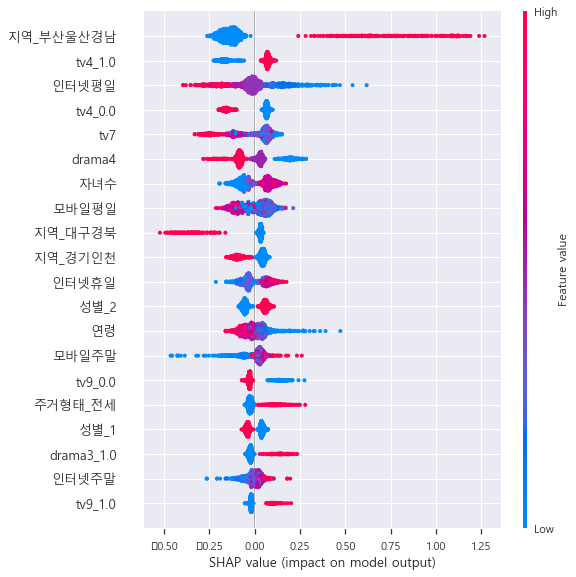

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [135]:
interpret_model(tunes_cat)